<a href="https://colab.research.google.com/github/tranquoctuan03/MachineLearning_20130457_TranQuocTuan/blob/main/Lab_7_20130457_TranQuocTuan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [26]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Marching-Learning'
# code
from sklearn import datasets
from sklearn.model_selection import cross_validate
from sklearn import svm
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Marching-Learning


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
clf = svm.SVC(kernel ='sigmoid', random_state = 0)
scores = cross_validate(clf,X,y, scoring='accuracy', cv =10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [7]:
clf_randomforest=RandomForestClassifier(n_estimators=100)
X_new =  SelectKBest(k =4).fit_transform(X,y)
scores = cross_validate(clf_randomforest,X_new,y, scoring='accuracy', cv =10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))
     

['fit_time', 'score_time', 'test_score']
0.9666666666666666


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [23]:
dataset = datasets.load_digits()
X = dataset.data
y = dataset.target

# building model
kmeans = KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='lloyd') 
kmeans.fit(dataset.data)
clusters = kmeans.predict(dataset.data)

print(kmeans.cluster_centers_.shape)


from scipy.stats import mode
from sklearn.metrics import accuracy_score
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
#  print(mask)
 labels[mask] = mode(dataset.target[mask])[0]
#  print(labels[mask])
accuracy_kmean =  accuracy_score(dataset.target, labels)
precision_kmean = precision_score(dataset.target, labels,average='macro')
recall_kmean = recall_score(dataset.target, labels,average='macro')
f1_kmean = f1_score(dataset.target, labels,average='macro')

(10, 64)


<ipython-input-23-741eb4eae2ff>:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(dataset.target[mask])[0]


In [9]:
# Random Forest
rfc =RandomForestClassifier(n_estimators=100)
accurary_rfc = np.mean(cross_validate(rfc,X, y, scoring='accuracy', cv =10)['test_score'])
precision_rfc = np.mean(cross_validate(rfc,X, y, scoring='precision_macro', cv =10)['test_score'])
recall_rfc = np.mean(cross_validate(rfc,X, y, scoring='recall_macro', cv =10)['test_score'])
f1_rfc = np.mean(cross_validate(rfc,X, y, scoring='f1_macro', cv =10)['test_score'])


from sklearn.neighbors import KNeighborsClassifier
# kNN
knn = KNeighborsClassifier(n_neighbors=5)
accurary_knn = np.mean(cross_validate(knn,X, y, scoring='accuracy', cv =10)['test_score'])
precision_knn = np.mean(cross_validate(knn,X, y, scoring='precision_macro', cv =10)['test_score'])
recall_knn = np.mean(cross_validate(knn,X, y, scoring='recall_macro', cv =10)['test_score'])
f1_knn = np.mean(cross_validate(knn,X, y, scoring='f1_macro', cv =10)['test_score'])

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [27]:
# ComplementNB
from sklearn.naive_bayes import ComplementNB
comple = ComplementNB()
accurary_comple = np.mean(cross_validate(comple,X, y, scoring='accuracy', cv =10)['test_score'])
precision_comple = np.mean(cross_validate(comple,X, y, scoring='precision_macro', cv =10)['test_score'])
recall_comple = np.mean(cross_validate(comple,X, y, scoring='recall_macro', cv =10)['test_score'])
f1_comple = np.mean(cross_validate(comple,X, y, scoring='f1_macro', cv =10)['test_score'])
# MultinomialNB
from sklearn.naive_bayes import MultinomialNB
multiNB = MultinomialNB()
accurary_multiNB = np.mean(cross_validate(multiNB,X, y, scoring='accuracy', cv =10)['test_score'])
precision_multiNB = np.mean(cross_validate(multiNB,X, y, scoring='precision_macro', cv =10)['test_score'])
recall_multiNB = np.mean(cross_validate(multiNB,X, y, scoring='recall_macro', cv =10)['test_score'])
f1_multiNB = np.mean(cross_validate(multiNB,X, y, scoring='f1_macro', cv =10)['test_score'])

In [10]:
# GaussianNB
from sklearn.naive_bayes import GaussianNB
gaussNB = GaussianNB()
accurary_gaussNB = np.mean(cross_validate(gaussNB,X, y, scoring='accuracy', cv =10)['test_score'])
precision_gaussNB = np.mean(cross_validate(gaussNB,X, y, scoring='precision_macro', cv =10)['test_score'])
recall_gaussNB = np.mean(cross_validate(gaussNB,X, y, scoring='recall_macro', cv =10)['test_score'])
f1_gaussNB = np.mean(cross_validate(gaussNB,X, y, scoring='f1_macro', cv =10)['test_score'])

# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
bernoulli = BernoulliNB()
accurary_bernoulli = np.mean(cross_validate(bernoulli,X, y, scoring='accuracy', cv =10)['test_score'])
precision_bernoulli = np.mean(cross_validate(bernoulli,X, y, scoring='precision_macro', cv =10)['test_score'])
recall_bernoulli = np.mean(cross_validate(bernoulli,X, y, scoring='recall_macro', cv =10)['test_score'])
f1_bernoulli = np.mean(cross_validate(bernoulli,X, y, scoring='f1_macro', cv =10)['test_score'])
     

In [24]:
from prettytable import PrettyTable
t = PrettyTable(['algorithms','accuracy','precision','recall','f1'])

t.add_row(['K-mean',round(accuracy_kmean, 2),round(precision_kmean, 2),round(recall_kmean, 2),round(f1_kmean, 2)])
t.add_row(['Random Forest',round(accurary_rfc, 2),round(precision_rfc, 2),round(recall_rfc, 2),round(f1_rfc, 2)])
t.add_row(['GaussianNB',round(accurary_gaussNB, 2),round(precision_gaussNB, 2),round(recall_gaussNB, 2),round(f1_gaussNB, 2)])
t.add_row(['BernoulliNB',round(accurary_bernoulli, 2),round(precision_bernoulli, 2),round(recall_bernoulli, 2),round(f1_bernoulli, 2)])
t.add_row(['MultinomialNB',round(accurary_multiNB, 2),round(precision_multiNB, 2),round(recall_multiNB, 2),round(f1_multiNB, 2)])
t.add_row(['ComplementNB',round(accurary_comple, 2),round(precision_comple, 2),round(recall_comple, 2),round(f1_comple, 2)])

print(t)

+---------------+----------+-----------+--------+------+
|   algorithms  | accuracy | precision | recall |  f1  |
+---------------+----------+-----------+--------+------+
|     K-mean    |   0.79   |    0.8    |  0.79  | 0.79 |
| Random Forest |   0.95   |    0.96   |  0.95  | 0.95 |
|   GaussianNB  |   0.81   |    0.85   |  0.81  | 0.81 |
|  BernoulliNB  |   0.83   |    0.84   |  0.83  | 0.83 |
| MultinomialNB |   0.88   |    0.9    |  0.88  | 0.88 |
|  ComplementNB |   0.8    |    0.84   |  0.8   | 0.78 |
+---------------+----------+-----------+--------+------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [13]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)
# get clustering labels
labels = cluster.labels_
labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([7, 9, 4, ..., 4, 1, 4])

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

In [14]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
datashop = pd.read_csv('shopping-data.csv')
datashop

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


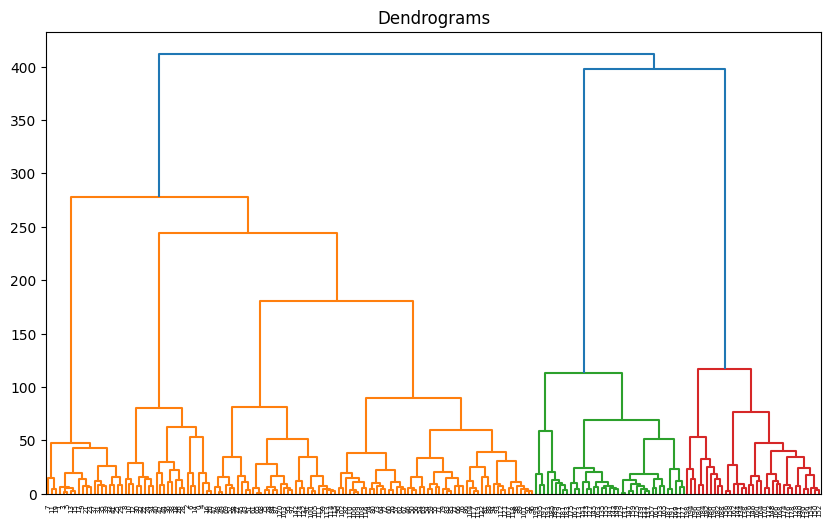

In [15]:
datashop.drop(['CustomerID', 'Genre'], axis=1, inplace=True)
Z = linkage(datashop, method='ward')
fig = plt.figure(figsize=(10, 6))
dn = dendrogram(Z)
plt.title('Dendrograms')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

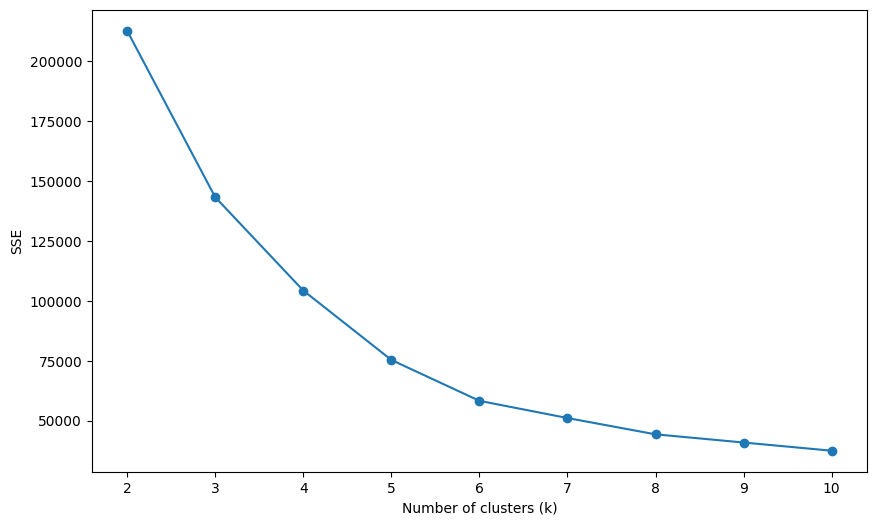

In [25]:
sse = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datashop)
    sse.append(kmeans.inertia_)

# Plot SSE values for each k
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sse, marker='o')
plt.title('')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.show()
     

In [17]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4, linkage='ward')
model.fit(datashop)
labels = model.labels_
labels
     

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#Finally,
Save a copy in your Github. Remember renaming the notebook.